**İsim: Abdullah Berkay Bayındır**

**ID: 191201053**

**Ders: BIL 470**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from itertools import cycle

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from LR import LinearRegression

# 1. Exploratory Data Analysis (EDA)

## 1.a. Veri Setinin Okunması

Veri setinin .csv uzantılı dosyadan çekilmesi aşağıdaki satırda yapılmıştır. İkinci okuma ise "*pair plots*" çizimi için ileriki aşamalarda kullanılacaktır.

In [4]:
phw_veri = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
phw_veri_pp = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

Veri setinin analizine başlanmadan önce "Gender" özniteliği silinmiştir. Çünkü tahminler "Height" ve "Weight" özniteliklerine göre yapılacaktır.

In [5]:
phw_veri = phw_veri.drop(labels="Gender", axis=1)

## 1.b. Veri Setinin Özeti

Yapılan değişiklikler sonucunda veri seti aşağıdaki gibi gözükmektedir. Aşağıdaki tablo incelendiğinde 500 verinin ve her bir verinin 2 öz niteliğinin bulunduğu görülmektedir. Buna ek olarak "Index" başlığı altında etiketleri gözükmektedir.

In [6]:
display(phw_veri)

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


Her bir özniteliğin istatistiksel analizi aşağıdaki gibidir. Bu aşamada her bir öz nitelikten kaç tane bulunduğu, ortalaması, standart sapması, minimum değeri, maksimum değeri ve belli yüzdelikleri görülebilmektedir.

In [7]:
he = phw_veri["Height"].describe()
we = phw_veri["Weight"].describe()

print(he)
print(we)

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64
count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64


Bu adımda veri seti içinde herhangi bir "*null*" değer olup olmadığı kontrol edilmiştir. Eğer olsaydı bu değerler uygun teknikler ile değiştirilecekti.

In [8]:
phw_veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  500 non-null    int64
 1   Weight  500 non-null    int64
 2   Index   500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


"nunique" metodu bu bölümde kullanılarak her bir öznitelik ve etiket içinde kaç farklı değerin olduğu aşağıdaki kod bloğunda gözlemlenmiştir. Bu metodun çıktısına göre sırasıyla "*Height*" ve "*Weight*" öznitelikleri için 60 ve 110 farklı değer bulunmaktadır.

In [9]:
uniqueVal = phw_veri.nunique()
print(uniqueVal)

Height     60
Weight    110
Index       6
dtype: int64


Bu adımda veri setinde birbirini tekrar eden verilerin olup olmadığı incelenmiştir. Ancak veri setinde bulunan verilerin sayısı az olduğu için bu veriler silinmemiştir. Toplamda ise 24 "*duplicate*" değere rastlanmıştır.

In [10]:
display(phw_veri[phw_veri.duplicated()])
display(phw_veri.duplicated().sum())

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24

Bu adımda veri setinin dengesi gözlemlenmiştir. Bu adımda yapılacak tahminlerden biri 0 ve 1 BMI'a sahip sınıfların yaşayacağı öğrenme zorluğu olacaktır. Bunun sebebi bu sınıfları öğrenmek için yeterli sayıda veri bulunmamasından kaynaklanmaktadır.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Obezite Seviyeleri Sayıları'}, xlabel='Index', ylabel='count'>

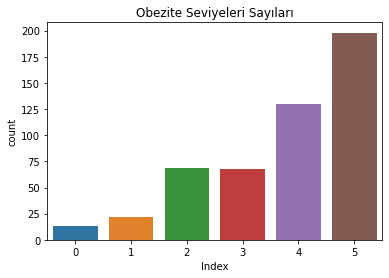

In [11]:
plt.title("Obezite Seviyeleri Sayıları")
sns.countplot(phw_veri["Index"])

Korelasyon matrisi çizdirilmeden önce öz niteliklerin sınıf ile ilişkisi grafik üzerinde gözlemlenmiştir. Aşağıdaki grafikte görüleceği üzere "*Weigh*" öz niteliğinin artışı sınıf değerinin artışını doğru oranda etkilemektedir. "*Height*" öz niteliğinin artışı ise tam tersi şekilde sınıf değerinin azamasına yol açmıştır.

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


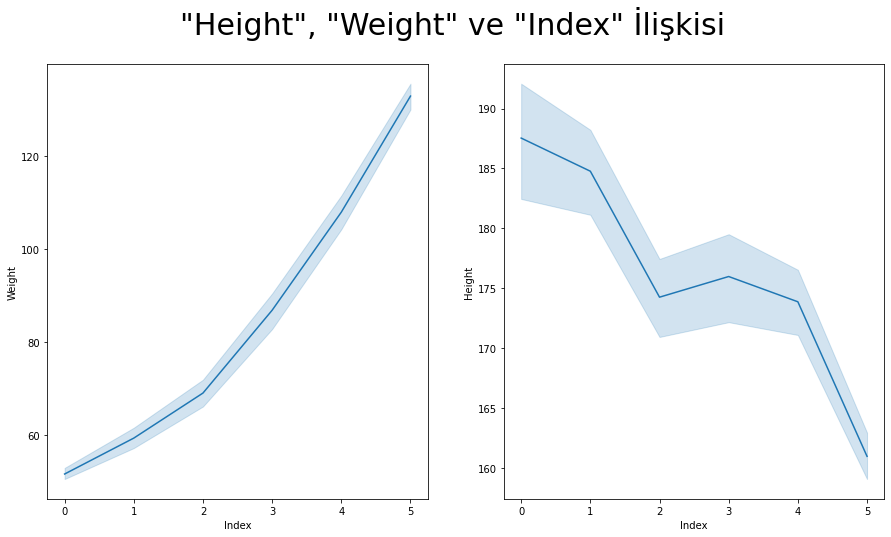

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.lineplot(phw_veri['Index'],phw_veri['Weight'], ax=ax[0])
sns.lineplot(phw_veri['Index'],phw_veri['Height'], ax=ax[1])
plt.suptitle('"Height", "Weight" ve "Index" İlişkisi', size=30)
plt.show()

## 1.c. Öznitelikler için "Pair Plots Çizdirilmesi"

Bu bölümde "python"un "seaborn" kütüphanesi kullanılarak "pair plot"lar çizdirimiştir. "Pair plot"lar iki öznitelik arasındaki ilişkiyi anlamak için önemli görsel araçlardır. 

Sol üst ve sağ alt köşedeki dağılımlar incelendiğinde beklenildiği üzere sınıf 5 e ait olan insanların hem yüksek kiloya hem de yüksek boya sahip olduğu görülmektedir.

Diğer köşegenlerdeki veri noktaları ise uzaydaki dağılımları göstermektedir. Bu grafikleden ise sınıf 0'a ait olan kişilerin uzun ve zayıf olduğu görülmektedir.

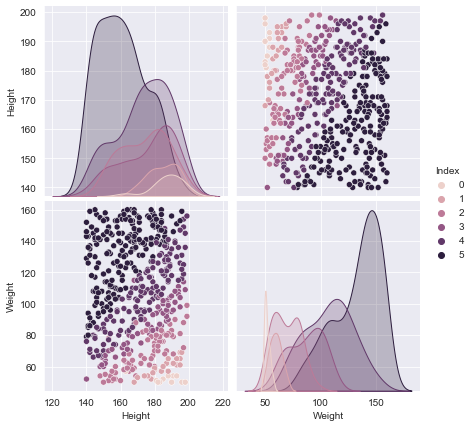

In [13]:
sns.set_style("darkgrid")
sns.pairplot(phw_veri_pp,hue="Index",height = 3)
plt.show()

## 1.d. Özniteliklerin Korelasyon Matrislerinin Çizdirilmesi

Bu kısımda farklı özniteliklerin ve etiket verisinin arasındaki korelasyon incelenmek için korelasyon matrisi çizdirilmiştir. Matris içindeki veriler eksi bir ile arti bir arasında değişmektedir; renk koyulaştıkça iki özellik arasındaki ilişkinin arttığı, renk açıldıkça iki öznitelik arasındaki ilişkinin azaldığı anlaşılmaktadır.

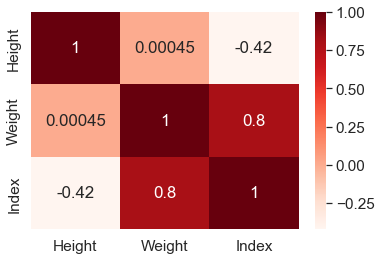

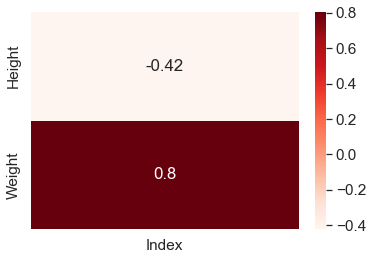

In [14]:
cm = phw_veri.corr()
ft = cm.drop(columns=["Height","Weight"])
ft = ft.drop(labels=["Index"])

sns.set(font_scale = 1.4);
sns.heatmap(cm, annot=True, cmap=plt.cm.Reds);
plt.show();

sns.set(font_scale = 1.4);
sns.heatmap(ft, annot=True, cmap=plt.cm.Reds);
plt.show();

İlk korelasyon matrisinden çıkarılabilecek sonuçlar sırasıyla: "*Index*" sınıfının doğrudan ve yüksek bir korelasyon ile "*Weight*" özniteliği ile ilişkili olduğudur. 

"*Height*" özniteliği ile sınıfın ise tersine bir korelasyonu vardır. Yani birinin artışı diğerini olumsuz yönde etkilemektedir.

"*Height*" ile "*Weight*" arasında ise korelasyon 0'a yakındır. Yani birbirleri ile ilişkileri çok fazla değildir.

# 2. Lineer Regresyonun İmplemente Edilmesi

Veri seti sıralı olmasa da farklı öğrenim setleri için farklı performansların gözlemlenmesi için veri seti karıştırılmıştır.Bu işlem aşağıdaki satırda görülmektedir.

In [15]:
shuffled_phw = phw_veri.sample(frac=1).reset_index(drop=True)
display(shuffled_phw);

,Height,Weight,Index
0,160,109,5
1,156,126,5
2,172,109,4
3,155,144,5
4,185,76,2
...,...,...,...
495,146,101,5
496,155,71,3
497,183,138,5
498,167,85,4


Bu adımda ise ödev dökümanında belirtildiği üzere eğitim ve test verisi biribirine eşit olacak şekilde ayrılmıştır.

In [16]:
x = shuffled_phw.values.tolist()
y = []
z = []
x1 = []

for row in x:
    z.append(int(row[2]))
    del row[2] 
    
for row in x:
    y.append(int(row[1]))
    del row[1]
    
for row in x:
    x1.append(int(row[0]))

x = pd.Series(x1)
y = pd.Series(y)
z = pd.Series(z)

X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(x, y, z, test_size = 0.5, shuffle = False)

X_train_list = X_train.values.tolist()
X_test_list = X_test.values.tolist()
Y_train_list = Y_train.values.tolist()
Y_test_list = Y_test.values.tolist()
Z_train_list = Z_train.values.tolist()
Z_test_list = Z_test.values.tolist()

Bu adımda "*phyton*" dosyasında oluşturulan "*LinearRegression*" sınıflandırıcı objesi alt satırdaki kod bloğunda oluşturulmuştur. 

"*learningR*" argümanı "*Gradient Descent*" algoritmasının adım uzunluğunu belirleyen bir parametredir. "*ePoch*" ise "*Gradient Descent*" algoritmasının kaç iterasyon çalışacağını belirlemektedir. Sonraki adımda "classifier" değişkeni üzerinden işlemler yürütülecektir.

In [17]:
classifier = LinearRegression(learning_rate = 0.000005, ePoch = 1000)

## 2.a. Sınıflandırıcının Eğitilmesi

Sınıflandırıcı eğitilmesi alt satırdaki kod bloğunda "fit" metodu kullanılarak gerçekleştirilmiştir. Argüman olarak da öznitelik ve sınıf eğitim setleri verilmiştir.

In [18]:
weightHistory = classifier.fit(X_train_list, Y_train_list, Z_train_list)

## 2.b. Test Verilerinin Sınıflarının Tahmin Edilmesi

Antrenman ve eğitim setlerinin tahmini için "*python*" dosyasında yazılan "*predict*" metodu kullanılmıştır. Bu metod sayesinde eğitim ve antrenman setlerinin çıktıları karşılaştırılmıştır.

In [19]:
z_pred_train = classifier.predict(X_train_list, Y_train_list) 
z_pred_test = classifier.predict(X_test_list, Y_test_list)

# 3. Sonuçlar

Sonuçlar incelenmeye başlanmadan önce ilk olarak "*loss*" ve "*accuracy*" değerleri hesaplanıp bir "*list*" içine konulmuştur. Bu değerlerin hesaplanması için önceki fonksiyon "*weight*"leri "*fit*" fonksiyonu ile geri dönülüp bir değişkende tutulmuştur.

In [20]:
arr_weightHistory = np.array(weightHistory)
epoch = arr_weightHistory[:,0]
m1 = arr_weightHistory[:,1]
m2 = arr_weightHistory[:,2]
b = arr_weightHistory[:,3]

sumo_train = 0
sumo_test = 0

mse_of_train = []
mse_of_test = []

accuracy_of_train = []
accuracy_of_test = []

accuracy_test = 0
accuracy_train = 0

for i in range(len(m1)):
    
    z_pred_acc_train = []
    z_pred_acc_test = []
    
    for j in range(len(X_train_list)):
        
        z_pred_mse_train = (m1[i]*X_train_list[j]) + (m2[i]*Y_train_list[j]) + b[i]
        z_pred_mse_test = (m1[i]*X_test_list[j]) + (m2[i]*Y_test_list[j]) + b[i]
        
        z_pred_acc_train.append(z_pred_mse_train)
        z_pred_acc_test.append(z_pred_mse_test)
        
        sumo_train +=((z_pred_train[j] - z_pred_mse_train)**2)
        sumo_test +=((z_pred_test[j] - z_pred_mse_test)**2)
        
    accuracy_train = r2_score(Z_train_list, z_pred_acc_train)*100
    accuracy_test = r2_score(Z_test_list, z_pred_acc_test)*100
    
    accuracy_of_train.append(accuracy_train)
    accuracy_of_test.append(accuracy_test)
        
    sumo_train /=(len(X_train_list))
    sumo_test /=(len(X_test_list))
    
    sumo_train = np.sqrt(sumo_train)
    sumo_test = np.sqrt(sumo_test)
    
    mse_of_train.append(sumo_train)
    mse_of_test.append(sumo_test)
    
arr_r2s_train = np.array(accuracy_of_train)
arr_r2s_test = np.array(accuracy_of_test)

arr_mse_train = np.array(mse_of_train)
arr_mse_test = np.array(mse_of_test)


"*Accuracy*" parametresinin değerlendirilmesi için R<sup>2</sup> ölçütü kullanılmıştır. R<sup>2</sup> ölçütünün denklemi aşağıdaki gibidir. Denklemdeki "*y*" ifadesi asıl "*target*" değerlerini, "*şapkalı y*" ifadesi regresyon sonucu oluşturulan denklemin çıktılarını ve "*üstü çizgili y*" ise "*target*" değerlerinin ortalamasını ifade etmektedir.
\begin{equation}
R^{2} = 1 - \frac{\sum{(y - \hat{y})^{2}}}{\sum{(y - \bar{y})^{2}}}
\end{equation}

R<sup>2</sup> ölçütü tahmin edilen "*target*" değerlerinin, asıl "*target*" değerlerine yakınlığını anlamamızı sağlayan bir ölçüttür. Bu ölçüt bire ne kadar yakınsa yapılan regresyon gerçeğe o kadar yakın olmuştur.

Aşağıda "*accuracy*" grafiği çizdirilmeden önce sistemin eğitim ve test verisi için ulaşması gereken R<sup>2</sup> değerleri görülmektedir. %65'e yakın olan bu değerler bir "*linear regression*" işlemi için gayet iyi değerlerdir.

In [21]:
Accuracy=r2_score(Z_train_list, z_pred_train)*100
print('Modelin Rsquared eğitim "accuracy"si = %.1f' %Accuracy)

Accuracy2 = r2_score(Z_test_list, z_pred_test)*100
print('Modelin Rsquared test "accuracy"si = %.1f' %Accuracy2)

Modelin Rsquared eğitim "accuracy"si = 67.0
Modelin Rsquared test "accuracy"si = 63.4


Bu aşamada modelin eğitim verisi üzerindeki "*accuracy*" parametresinin değişimi grafik üzreinde görülmektedir. R<sup>2</sup> ölçütünün başlangıç noktası çok düşük olduğu için çözünürlülüğü arttırmak amacıyla ikinci grafikte yakından çizdirilmişitir. 1000 iterasyon sonucunda "*accuracy*"nin çok hızlı bir şekilde artıp %67 seviyelerine geldiği görülmektedir. Yaklaşık 600. iterasyondan sonra "*accuracy*"de hızlı bir artış gözlemlenmiştir.

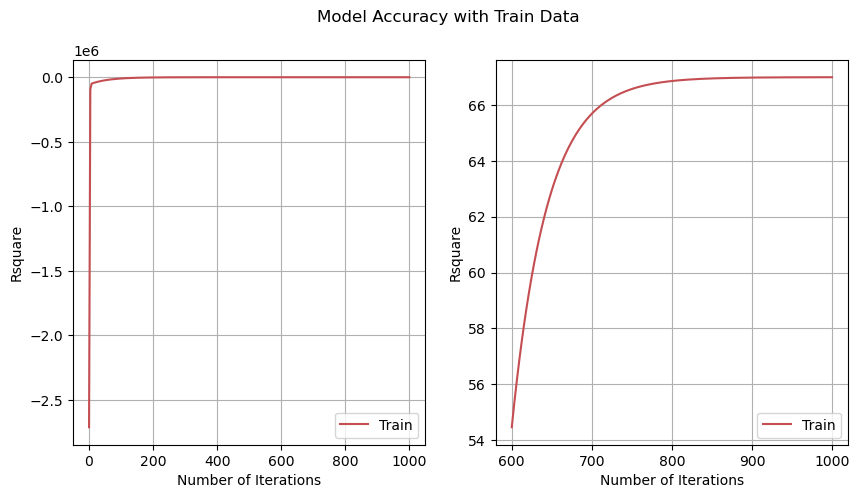

In [29]:
x__ = np.linspace(0, 1000, 250)
x_2 = np.linspace(600, 1000, 130)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Model Accuracy with Train Data')
ax1.plot(x__, arr_r2s_train, color='r', label='Train')
ax1.set_ylabel("Rsquare")
ax1.set_xlabel("Number of Iterations")
ax1.legend(loc="lower right")
ax2.plot(x_2, arr_r2s_train[120:], color='r', label='Train')
ax2.set_ylabel("Rsquare")
ax2.set_xlabel("Number of Iterations")
ax2.legend(loc="lower right")
ax1.grid()
ax2.grid()

Bu aşamada modelin test verisi üzerindeki "*accuracy*" parametresinin değişimi grafik üzreinde görülmektedir. R<sup>2</sup> ölçütünün başlangıç noktası çok düşük olduğu için çözünürlülüğü arttırmak amacıyla ikinci grafikte yakından çizdirilmişitir. 1000 iterasyon sonucunda "*accuracy*"nin çok hızlı bir şekilde artıp %64 seviyelerine geldiği görülmektedir.Yaklaşık 600. iterasyondan sonra "*accuracy*"de hızlı bir artış gözlemlenmiştir.

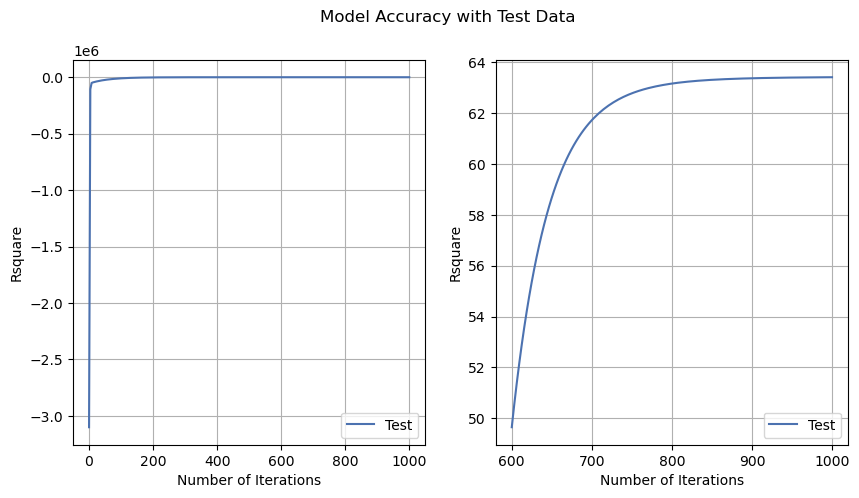

In [30]:
x__ = np.linspace(0, 1000, 250)
x_2 = np.linspace(600, 1000, 130)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Model Accuracy with Test Data')
ax1.plot(x__, arr_r2s_test, color='b', label='Test')
ax1.set_ylabel("Rsquare")
ax1.set_xlabel("Number of Iterations")
ax1.legend(loc="lower right")
ax2.plot(x_2, arr_r2s_test[120:], color='b', label='Test')
ax2.set_ylabel("Rsquare")
ax2.set_xlabel("Number of Iterations")
ax2.legend(loc="lower right")
ax1.grid()
ax2.grid()

Bu kısımda ise modelin kayıp grafiği "*Root Mean Square (RMS) Error*" kullanılarak görselleştirilmiştir. Yine "*accuracy*"de olduğu gibi çözünürlülüğü arttırmak için bir uzakan bir yakından grafik çizdirilmiştir. 1000 iteraston sonucunda eğitim verisi üzerindeki hatanın 0.01'in altına düşürülmesi sağlanmıştır. 

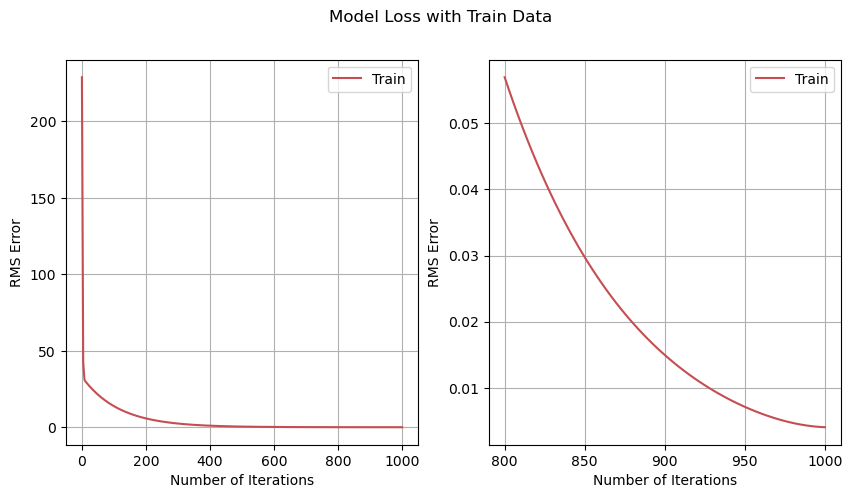

In [31]:
x__ = np.linspace(0, 1000, 250)
x_2 = np.linspace(800, 1000, 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Model Loss with Train Data')
ax1.plot(x__, arr_mse_train, color='r', label='Train')
ax1.set_ylabel("RMS Error")
ax1.set_xlabel("Number of Iterations")
ax1.legend(loc="upper right")
ax2.plot(x_2, arr_mse_train[180:], color='r', label='Train')
ax2.set_ylabel("RMS Error")
ax2.set_xlabel("Number of Iterations")
ax2.legend(loc="upper right")
ax1.grid()
ax2.grid()

 1000 iteraston sonucunda test verisi üzerindeki hatanın 0.01'in altına düşürülmesi sağlanmıştır.

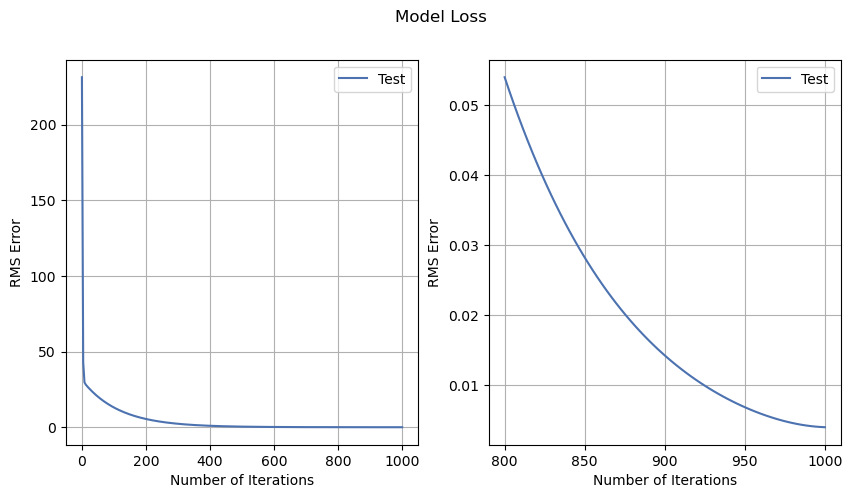

In [32]:
x__ = np.linspace(0, 1000, 250)
x_2 = np.linspace(800, 1000, 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Model Loss')
ax1.plot(x__, arr_mse_test, color='b', label='Test')
ax1.set_ylabel("RMS Error")
ax1.set_xlabel("Number of Iterations")
ax1.legend(loc="upper right")
ax2.plot(x_2, arr_mse_test[180:], color='b', label='Test')
ax2.set_ylabel("RMS Error")
ax2.set_xlabel("Number of Iterations")
ax2.legend(loc="upper right")
ax1.grid()
ax2.grid()

"*Target*"lerin ve tahmin edilmiş değerlerin, ortalaması ve standart sapması karşılaştırıldığında birbirine gayet yakın sonuçlar elde edildiği gözlemlenmiştir. Bu da isabetli sonuçlar elde edildiğinin başka bir göstergesidir.

In [26]:
z_pred_pd = pd.Series(z_pred_train)
z_train_pd = pd.Series(Z_train_list)

print("Predicted Mean", z_pred_pd.mean())
print("Actual Mean", z_train_pd.mean())
print('\n')
print("Predicted Standard Deviation", z_pred_pd.std())
print("Actual Standard Deviation", z_train_pd.std())

Predicted Mean 3.6238568368190385
Actual Mean 3.676


Predicted Standard Deviation 1.3009192472909659
Actual Standard Deviation 1.3924004870962454


Bu grafik ise sonuçların daha net yorumlanması ve anlamlandırılması için başka bir çözümdür. Burada mavi noktalar modelin tahminlerini temsil etmektedir. Şekildeki y = x doğrusunun üzerindeki veri dağılımları ne kadar verinin yakın veya alakasız sınıflandırıldığını anlamamıza yaramaktadır. Örneğin bu grafiğe bakarak, BMI'si "*0*" ve "*1*" olan insanlar için başarılı bir iş çıkarılmadığı söylenebilmektedir. Bunun sebebi "*0*" ve "*1*"e ait çok fazla verinin bulunmamasından kaynaklanmaktadır. Ancak geri kalan sınıflar için başarılı bir sınıflandırma olmuştur. 

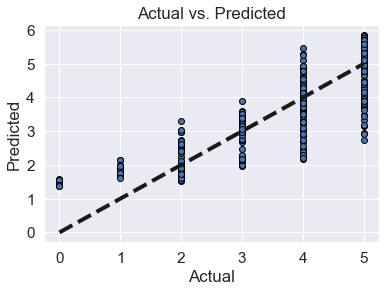

In [27]:
fig, ax = plt.subplots()
ax.scatter(z_train_pd, z_pred_pd, edgecolors=(0, 0, 0))
ax.plot([z_train_pd.min(), z_train_pd.max()], [z_train_pd.min(), z_train_pd.max()], 'k--', lw=4)

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs. Predicted')
plt.show()

Son olarak da üç boyutlu düzlemde karar yüzeyinin ve verilerin dağılımını dahan net gözlmelemek için aşağıdaki gibi üç farklı perspektiften veri seti ve sınıflandırma yüzeyi çizdirilmiştir. Kırmızı noktalar sınıflandırıcı fonksiyonu temsil ederken, siyah noktalar verilerdir. Şekillerden de anlaşılacağı üzere veri setinin dağılımına yakın bir yüzey elde edilmiştir.

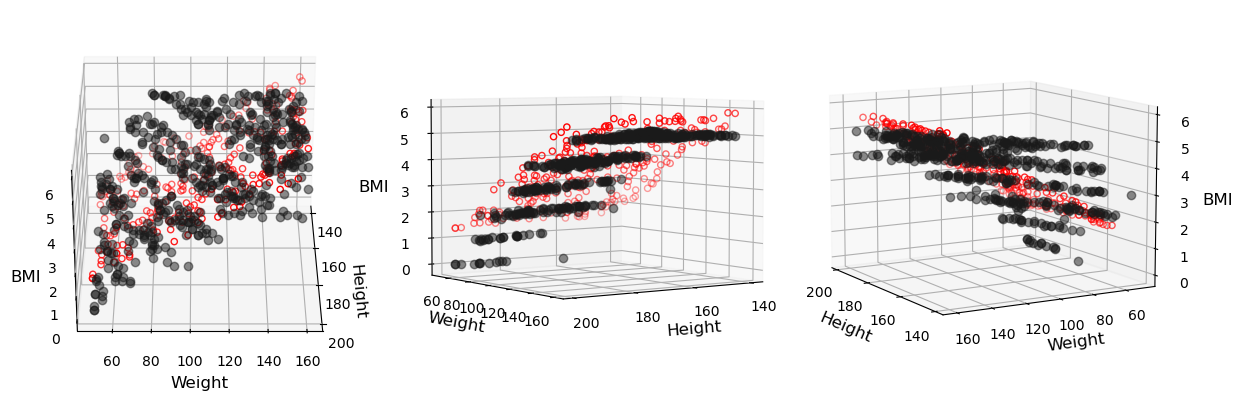

In [28]:
X = phw_veri[['Height', 'Weight']].values.reshape(-1,2)
Y = phw_veri['Index']

x = X[:, 0]
y = X[:, 1]
z = Y

arr_x = np.array(X_train_list)
arr_y = np.array(Y_train_list)
arr_z = np.array(z_pred_train)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(arr_x.flatten(), arr_y.flatten(), arr_z, facecolor=(0,0,0,0), s=20, edgecolor='red')
    ax.set_xlabel('Height', fontsize=12)
    ax.set_ylabel('Weight', fontsize=12)
    ax.set_zlabel('BMI', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=30, azim=0)
ax2.view_init(elev=4, azim=55)
ax3.view_init(elev=10, azim=150)

fig.tight_layout()